### Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('../Data/Dataset_ecommerce.csv')
data.head(10)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
5,536365,2010-12-01 08:26:00,17850.0,SC7895,Toys,41,45.31,Sierra Leone
6,536365,2010-12-01 08:26:00,17850.0,SC8608,Books,44,39.31,Benin
7,536366,2010-12-01 08:28:00,17850.0,SC3216,Toys,47,77.35,Burkina Faso
8,536366,2010-12-01 08:28:00,17850.0,SC1236,Kitchenware,19,35.11,Nigeria
9,536367,2010-12-01 08:34:00,13047.0,SC4513,Furniture,55,3.21,Cote d'Ivoire


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [7]:
data.describe(include= 'O')

,InvoiceNo,InvoiceDate,StockCode,Description,Country
count,541909,541909,541909,541909,541909
unique,25900,23260,9000,10,28
top,573585,2011-10-31 14:41:00,SC2014,Sports Equipment,Cote d'Ivoire
freq,1114,1114,96,54765,19651


In [8]:
#Checking Missing data
data[data["CustomerID"].isna()].head(10)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
622,536414,2010-12-01 11:52:00,NaN,SC7308,Kitchenware,93,62.55,Senegal
1443,536544,2010-12-01 14:32:00,NaN,SC3127,Toys,86,22.90,Burkina Faso
1444,536544,2010-12-01 14:32:00,NaN,SC3641,Kitchenware,7,72.45,Nigeria
1445,536544,2010-12-01 14:32:00,NaN,SC5252,Cosmetics,39,32.46,Ghana
1446,536544,2010-12-01 14:32:00,NaN,SC1375,Toys,39,3.12,South Africa
1447,536544,2010-12-01 14:32:00,NaN,SC8920,Books,25,75.53,Algeria
1448,536544,2010-12-01 14:32:00,NaN,SC6558,Furniture,85,34.28,Sudan
1449,536544,2010-12-01 14:32:00,NaN,SC3207,Furniture,40,89.41,Cote d'Ivoire
1450,536544,2010-12-01 14:32:00,NaN,SC4675,Sports Equipment,68,60.70,Sudan
1451,536544,2010-12-01 14:32:00,NaN,SC1904,Sports Equipment,33,61.02,Mozambique


In [9]:
data.isna().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [10]:
#Droping missing value in customerID
data = data.dropna(subset=["CustomerID"])

In [11]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [13]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [14]:
#To know the length of data loss due to cleaning
len(data)

406829

### Feature Engineering

In [16]:
data["TotalPrice"] = data["UnitPrice"] * data["Quantity"]

In [17]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


In [18]:
#Aggregating by grouping and computing into Recency,Frequency and monetary value

aggregated_data = data.groupby(by="CustomerID", as_index=False) \
    .agg(
        MonetaryValue=("TotalPrice", "sum"),
        Frequency=("InvoiceNo", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

In [19]:
aggregated_data.head(5)

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,5342.40,2,2011-01-18 10:17:00
1,12347.0,431501.00,7,2011-12-07 15:52:00
2,12348.0,82378.47,4,2011-09-25 13:13:00
3,12349.0,176075.12,1,2011-11-21 09:51:00
4,12350.0,48173.37,1,2011-02-02 16:01:00


In [20]:
#To get our Recency Feature
max_invoice_data = aggregated_data["LastInvoiceDate"].max()

max_invoice_data


Timestamp('2011-12-09 12:50:00')

In [21]:
#Recency measure in days

aggregated_data["Recency"] = (max_invoice_data - aggregated_data["LastInvoiceDate"]).dt.days
aggregated_data.head(5)

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,5342.40,2,2011-01-18 10:17:00,325
1,12347.0,431501.00,7,2011-12-07 15:52:00,1
2,12348.0,82378.47,4,2011-09-25 13:13:00,74
3,12349.0,176075.12,1,2011-11-21 09:51:00,18
4,12350.0,48173.37,1,2011-02-02 16:01:00,309


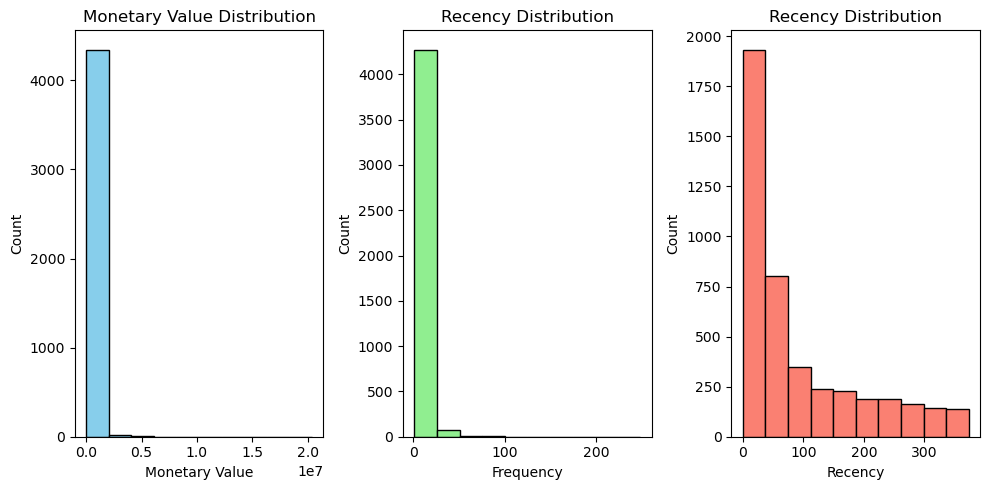

In [22]:
#Looking at the distribution of the features to see whether there are outliers in our dataset using Histogram

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_data["MonetaryValue"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Monetary Value")
plt.ylabel('Count')
plt.title('Monetary Value Distribution')

plt.subplot(1, 3, 2)
plt.hist(aggregated_data["Frequency"], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel("Frequency")
plt.ylabel('Count')
plt.title('Recency Distribution')

plt.subplot(1, 3, 3)
plt.hist(aggregated_data["Recency"], bins=10, color='salmon', edgecolor='black')
plt.xlabel("Recency")
plt.ylabel('Count')
plt.title('Recency Distribution')

plt.tight_layout()
plt.show()

### Addressing Outliers

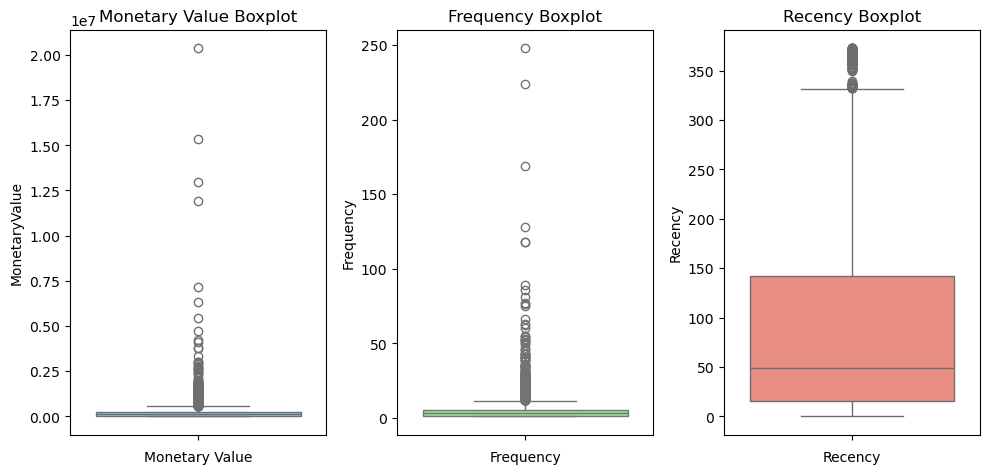

In [46]:
#Using box plot for outlier detection 

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(aggregated_data["MonetaryValue"], color='skyblue')
plt.xlabel("Monetary Value")
plt.title('Monetary Value Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(aggregated_data["Frequency"], color='lightgreen')
plt.xlabel("Frequency")
plt.title('Frequency Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_data["Recency"], color='salmon')
plt.xlabel("Recency")
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

In [56]:
#To get ride of our outliers we will establish our quantile using inter quantile range method

M_Q1 = aggregated_data["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_data["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

#To seperate out our outliers
monetary_outliers_data = aggregated_data[(aggregated_data["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_data["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()
monetary_outliers_data.describe()


,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,389.000000,3.890000e+02,389.000000,389,389.000000
mean,15346.498715,1.241522e+06,19.753213,2011-11-20 23:10:26.838046208,18.084833
min,12359.000000,5.851965e+05,1.000000,2011-02-10 14:38:00,0.000000
25%,14040.000000,6.977978e+05,8.000000,2011-11-17 09:51:00,3.000000
50%,15356.000000,8.691067e+05,13.000000,2011-11-30 11:32:00,9.000000
75%,16873.000000,1.198462e+06,22.000000,2011-12-06 12:27:00,22.000000
max,18283.000000,2.038383e+07,248.000000,2011-12-09 12:49:00,301.000000
std,1723.167891,1.640194e+06,24.208731,NaN,29.398094


In [60]:
F_Q1 = aggregated_data["Frequency"].quantile(0.25)
F_Q3 = aggregated_data["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

#To seperate out our outliers
frequency_outliers_data = aggregated_data[(aggregated_data["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_data["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()
frequency_outliers_data.describe()


,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,397.000000,3.970000e+02,397.000000,397,397.000000
mean,15196.433249,1.010257e+06,23.758186,2011-11-23 03:37:15.264483840,15.919395
min,12362.000000,2.837063e+04,12.000000,2011-02-10 14:38:00,0.000000
25%,13756.000000,3.981096e+05,14.000000,2011-11-20 13:20:00,2.000000
50%,15046.000000,6.711158e+05,17.000000,2011-12-01 12:39:00,8.000000
75%,16722.000000,1.077221e+06,26.000000,2011-12-07 09:02:00,18.000000
max,18283.000000,2.038383e+07,248.000000,2011-12-09 12:49:00,301.000000
std,1758.862785,1.681644e+06,22.669161,NaN,30.751424
